In [2]:
import sys
import os

current_dir = os.getcwd()
src_dir = os.path.join(current_dir, '..', 'src')
sys.path.append(src_dir)

import pandas as pd
from dqc.dqc import DataQualityPipeline
from etl.etl import ETL, RelationsTransform
from etl.kaggle_data_loader import download_data

In [3]:
download_data()

data_paths = {}

for dirname, _, filenames in os.walk(f'{src_dir}/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data_paths[filename] = f"{dirname}/{filename}"

relations = {}

for file, path in data_paths.items():
    relations[file.split('.')[0]] = pd.read_csv(path)

/home/sandra/Projects/ds_practice/notebooks/../src/data/sales_train.csv
/home/sandra/Projects/ds_practice/notebooks/../src/data/item_categories.csv
/home/sandra/Projects/ds_practice/notebooks/../src/data/sample_submission.csv
/home/sandra/Projects/ds_practice/notebooks/../src/data/items.csv
/home/sandra/Projects/ds_practice/notebooks/../src/data/test.csv
/home/sandra/Projects/ds_practice/notebooks/../src/data/shops.csv


In [4]:
report = DataQualityPipeline()(relations)

In [5]:
filter_pipes = {
        "sales_train": [lambda df: df[(-10 < df["item_price"]) & (df["item_price"]  <= 60000)],
                        lambda df: df[(0 <= df["item_cnt_day"]) & (df["item_cnt_day"] <= 4.0)],
                        lambda df: df[~df.duplicated(keep="first")],
                        ],
    }

transform = RelationsTransform(filter_pipes)

etl = ETL(transform)
full_relations = etl.load()
full_relations

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
4,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...,...
2890596,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2890597,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2890598,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2890599,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""


# Exploratory Data Analysis:
1. Calculate descriptive statistics
2. Visualize the data using graphs, charts, and histograms
3. Identify patterns and trends in the data
4. Test hypotheses and make predictions based on the data

TO DO:
1. general dynamic [count, avg, sum]
2. dynamic for each shop 
3. dynamic distribution depend on shop (One figure for all shops)
4. correlation between series for each shop
5. autocorrelation for series for each shop
6. categorical data cardinality [shop_id, item_id]
7. distribution of shops
8. distribution of items
9. distribution of items for shops

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
full_relations["date"] = pd.to_datetime(full_relations["date"], format="%d.%m.%Y")
full_relations["year"] = full_relations["date"].dt.year
full_relations["week_of_year"] = full_relations["date"].dt.isocalendar().week
# full_relations.drop(["item_name", "item_category_name", "shop_name"], axis=1, inplace=True)
full_relations["day_revenue"] = full_relations["item_price"]*full_relations["item_cnt_day"]
full_relations

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,year,week_of_year,day_revenue
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,1,999.00
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,1,899.00
2,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,1,1709.05
3,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",2013,3,1099.00
4,2013-01-10,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум""",2013,2,349.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890596,2015-10-10,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015,41,299.00
2890597,2015-10-09,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015,41,299.00
2890598,2015-10-14,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015,42,349.00
2890599,2015-10-22,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум""",2015,43,299.00


In [8]:
week_revenue_sum = pd.DataFrame(full_relations.groupby(["year", "week_of_year"])["day_revenue"].sum())
week_revenue_mean = pd.DataFrame(full_relations.groupby(["year", "week_of_year"])["day_revenue"].mean())
week_revenue_count = pd.DataFrame(full_relations.groupby(["year", "week_of_year"])["item_id"].count())
week_revenue_stats = {"sum": week_revenue_sum,
       "mean": week_revenue_mean,
       "count": week_revenue_count
        }

In [9]:
def plot_week_revenue_stats(dfs):
    years = [2013, 2014, 2015]
    fig , axs = plt.subplots(3, 3, figsize=(14, 8), sharex=True)
    fig.suptitle("Per year statistical dynamics")
    keys = sorted(dfs.keys())
    labels = ["Item count", "Mean revenue", "Sum revenue"]
    for i in range(len(years)):
        for j in range(len(keys)):
            axs[i, j].set(ylabel=labels[j])
            table = dfs[keys[j]].loc[years[i]]
            axs[i, j].plot(table)
            axs[i, j].set_title(f'{years[i]} {keys[j]} per week')

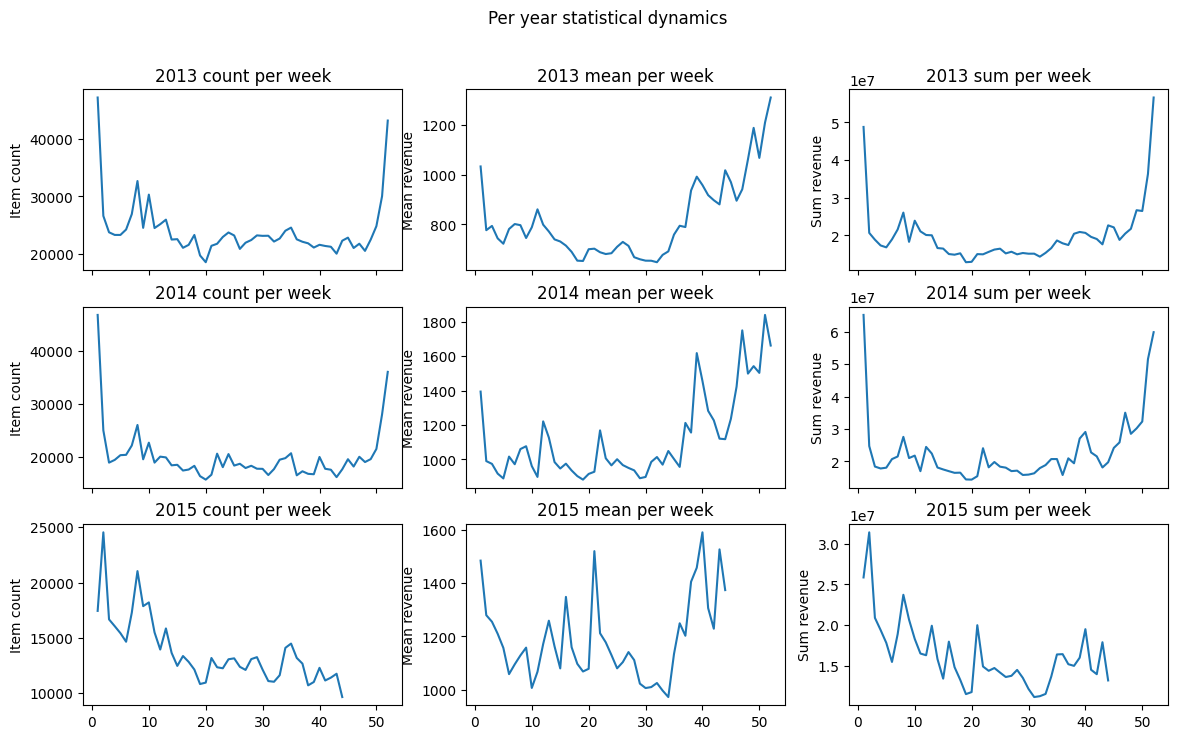

In [10]:
plot_week_revenue_stats(week_revenue_stats)

In [11]:
# Last week for 2015
max(pd.DataFrame(full_relations.groupby(["year", "week_of_year"])["item_id"].sum()).loc[2015].index)

44

* Incoplete 2015 from week 44
* Item sales are going up at the end of years 2013-2014
* Item purchase by shops is held in the beggining of the year

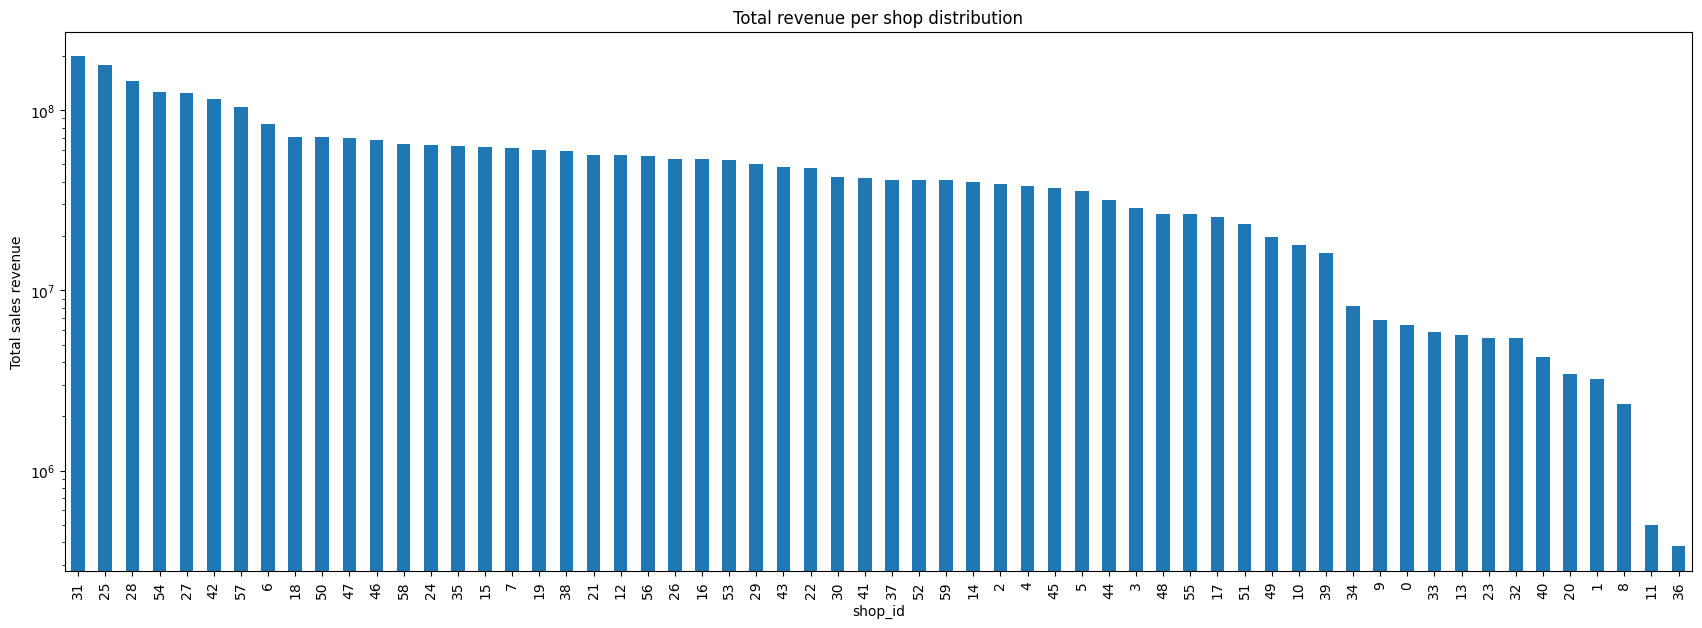

In [12]:
shops_revenue = full_relations[["shop_id", "day_revenue"]].groupby("shop_id").sum()["day_revenue"]
plt.title("Total revenue per shop distribution")
plt.ylabel("Total sales revenue")
shops_revenue.sort_values(ascending=False).plot.bar(figsize=(21, 7), logy=True)
plt.show()

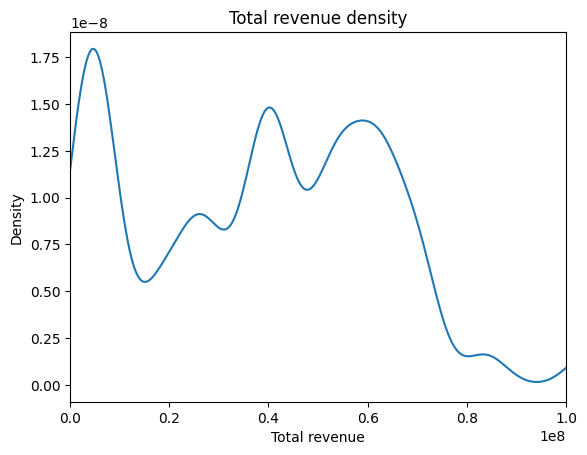

In [13]:
plt.xlabel("Total revenue")
plt.xlim([0, 10**8])
plt.title("Total revenue density")
shops_revenue.plot.kde(bw_method=0.1);
plt.show()

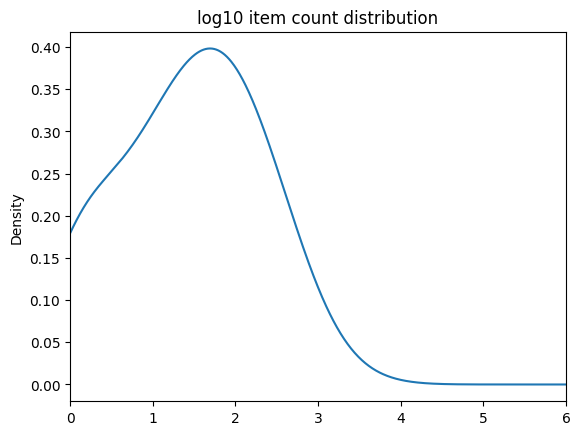

In [14]:
item_count = np.log10(full_relations.groupby(["item_id"])["item_id"].count())
plt.title("log10 item count distribution")
plt.xlim(left=0, right=6)
item_count.plot.kde(bw_method=0.5);

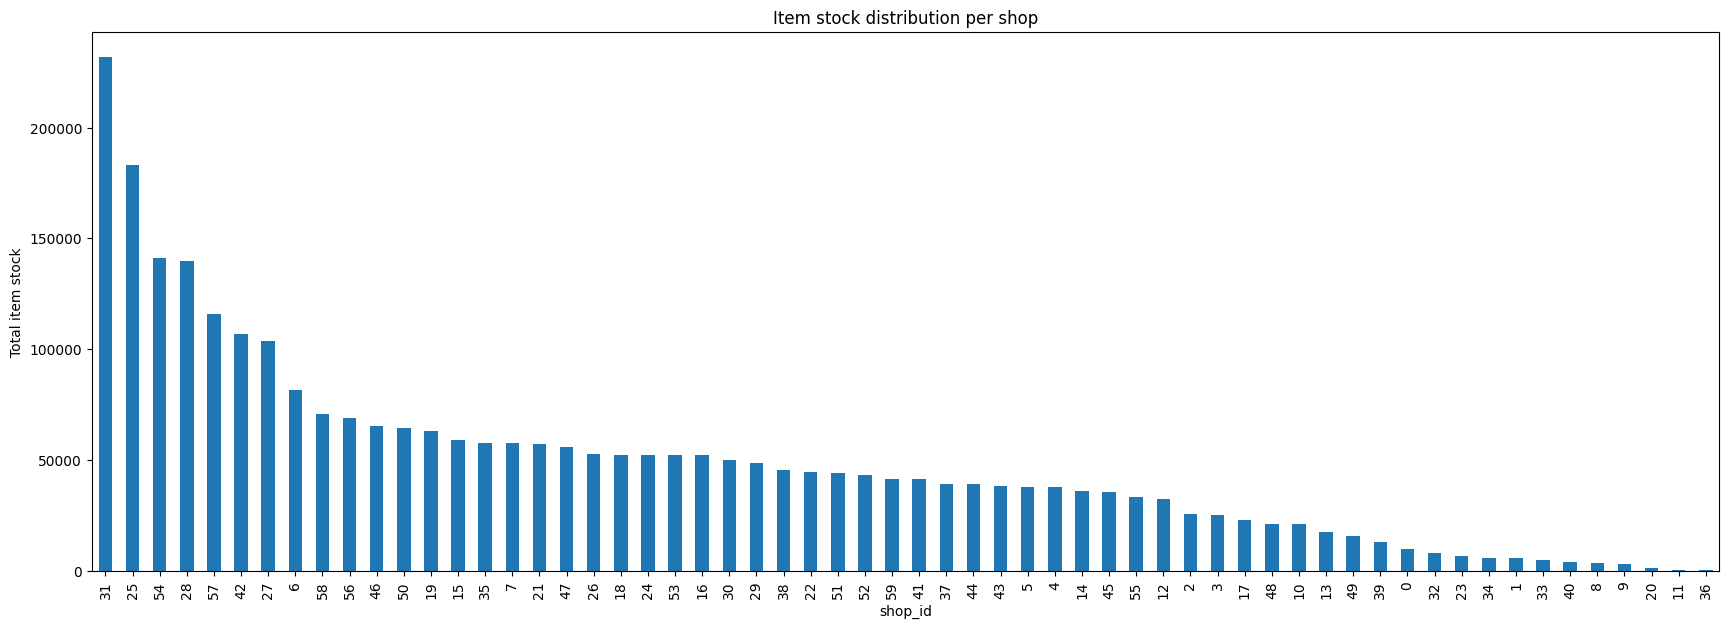

In [15]:
shops_items = full_relations[["item_id", "shop_id"]].groupby("shop_id").count()["item_id"]
shops_items.sort_values(ascending=False).plot.bar(figsize=(21, 7))
plt.title("Item stock distribution per shop")
plt.ylabel("Total item stock")
plt.show();

In [16]:
revenue_dynamic_for_shops = []
for i, shop_df in full_relations.groupby("shop_id"):
    shop_df["revenue_per_day"] = shop_df["item_cnt_day"] * shop_df["item_price"]
    revenue_dynamic_for_shops.append(shop_df[["date", "revenue_per_day"]])

In [17]:
group_category = "date_block_num"
data = full_relations[["item_price", group_category]].groupby([group_category])

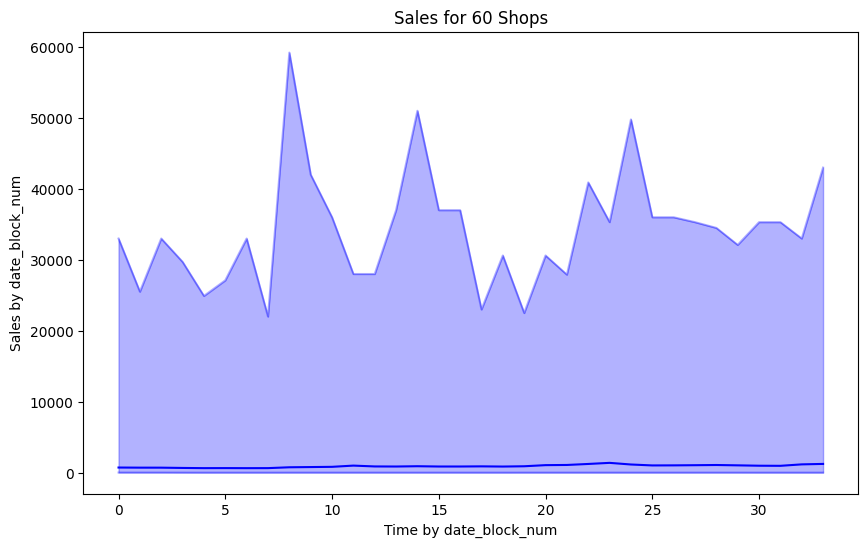

In [18]:
mean = data.mean().reset_index(drop=True)
max_= data.max()["item_price"].reset_index(drop=True)
min_= data.min()["item_price"].reset_index(drop=True)
# print(mean.shape)
# Create the single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series with transparency to distinguish between them
# for col in sales_data.columns:
#     ax.plot(sales_data[col], alpha=0.05, color="b")

ax.plot(min_, color="b", alpha=0.3)
ax.plot(mean, color="b")
ax.fill_between(x=mean.index.astype(np.float64), y1=min_, y2=max_, alpha=0.3, color="b")
ax.plot(max_, color="b", alpha=0.3)

# Add a title and axis labels
ax.set_title("Sales for 60 Shops")
ax.set_xlabel(f"Time by {group_category}")
ax.set_ylabel(f"Sales by {group_category}")

# Show the plot
plt.show()

In [19]:
print(f"Average mean - {np.mean(mean)}\nAverage max - {np.mean(max_)}\nAverage min - {np.mean(min_)}")

Average mean - 905.502029892616
Average max - 34244.205882352944
Average min - 2.753235294117647
